In [5]:
#Import libraries

from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os

from PIL import Image

from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

%matplotlib inline

In [2]:
#read files
df = pd.read_csv("/workspaces/Artist_Emotions-1/data/WikiArt-info.tsv", sep='\t')
df.head()

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
0,58c6237dedc2c9c7dc0de1ae,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,https://uploads3.wikiart.org/00123/images/char...,https://www.wikiart.org/en/charles-courtney-cu...,https://www.wikiart.org/en/charles-courtney-cu...
1,577280dfedc2cb3880f28e76,Neo-Expressionism,Keith Haring,The Marriage of Heaven and Hell,1984,https://uploads1.wikiart.org/images/keith-hari...,https://www.wikiart.org/en/keith-haring/the-ma...,https://www.wikiart.org/en/keith-haring
2,57727f2dedc2cb3880ed5fa9,Post-Impressionism,Jozsef Rippl-Ronai,Uncle Piacsek in front of the Black Sideboard,1906,https://uploads3.wikiart.org/images/j-zsef-rip...,https://www.wikiart.org/en/jozsef-rippl-ronai/...,https://www.wikiart.org/en/jozsef-rippl-ronai
3,58d1240cedc2c94f900fc610,Cubism,Vadym Meller,Monk. For the Play &#39;Mazeppa&#39;,1920,https://uploads2.wikiart.org/00124/images/vady...,https://www.wikiart.org/en/vadym-meller/monk-f...,https://www.wikiart.org/en/vadym-meller
4,57727de7edc2cb3880e91f26,Romanticism,David Wilkie,The Defence of Sarago&#231;a,1828,https://uploads6.wikiart.org/images/david-wilk...,https://www.wikiart.org/en/david-wilkie/the-de...,https://www.wikiart.org/en/david-wilkie


In [6]:
# method that takes in colors in RGB format and returns the HEX format
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [8]:
#directory of the images 
dir = "/workspaces/Artist_Emotions-1/images2"

In [9]:
# a method to get the paths of all the images in the folder

def get_image_paths(facedir):
    image_paths = []
    if os.path.isdir(facedir):
        images = os.listdir(facedir)
        image_paths = [os.path.join(facedir,img) for img in images]
    return image_paths 

In [10]:
image_paths = get_image_paths(dir)

In [18]:
p_path =image_paths[27]
p_path

'/workspaces/Artist_Emotions-1/images2/billy-waters-mariner-and-street-performer-beggar-1815.jpg'

In [19]:
# a method that reads the image from the image path 
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [20]:
image = get_image(p_path)

In [23]:
# number_of_colors: how many colors do you want to display in color wheel from your image
# show_chart is a boolean where you want to show the color wheel chart of your image or not
number_of_colors = 6
show_chart = 1

In [24]:
# this function passes an image and the number of colors to display and returns the RGB colors of the image
def get_colors(image, number_of_colors, show_chart):

    # modify image to pass on to kMeans
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)

    center_colors = clf.cluster_centers_

    ordered_colors = [center_colors[i] for i in counts.keys()]

    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]

    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)


        
    return rgb_colors
    



[array([242.44373105, 218.51738898, 158.89209916]),
 array([234.9860533 , 188.70746936,  46.29589574]),
 array([249.45294548, 211.2437228 ,  66.80446234]),
 array([120.80489035,  60.50655407,  22.78522813]),
 array([54.74326695, 18.8048705 ,  2.97925911]),
 array([204.78799417,  81.59259559,  38.16145496])]

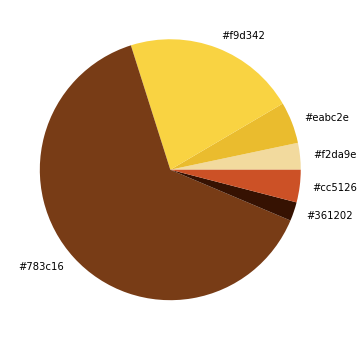

In [25]:
get_colors(image, number_of_colors, show_chart)
# get_colors(image, number_of_colors)

### Search Images using color

In [27]:
# IMAGE_DIRECTORY = 'images'
IMAGE_DIRECTORY = dir
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'Red' : [255 , 0, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))


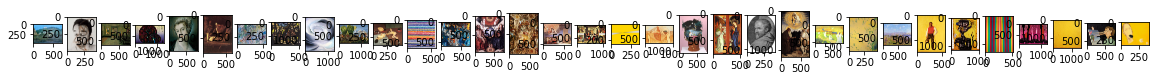

In [28]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [30]:
threshold = 55
# Green threshold 70
# blue threshold 140-255
# Yellow, 50-60
# Red Threshold  50-255

In [29]:
# The color of the cluster you want to match 
color =  COLORS['YELLOW']

In [36]:
# This code 
def match_image_by_color(image, color, threshold , number_of_colors, show_chart): 
    
    image_colors = get_colors(image, number_of_colors, get_colors)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        #finding delta (difference between current color and other colors in the loop)
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

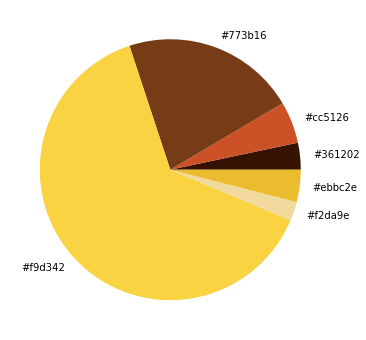

In [37]:
colors_to_match = match_image_by_color(image, color, threshold, number_of_colors, show_chart)


In [48]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match,
                                        show_chart )
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1
    print(index)

In [49]:
selected_color = COLORS['YELLOW']

In [50]:
plt.figure(figsize = (20, 10))
show_selected_images(images, selected_color, 55, 3)

/tmp/ipykernel_10393/1682453752.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (8, 6))
